In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [14]:
# load data
titanic_data = pd.read_csv("train.csv")

In [ ]:
titanic_data.head()

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

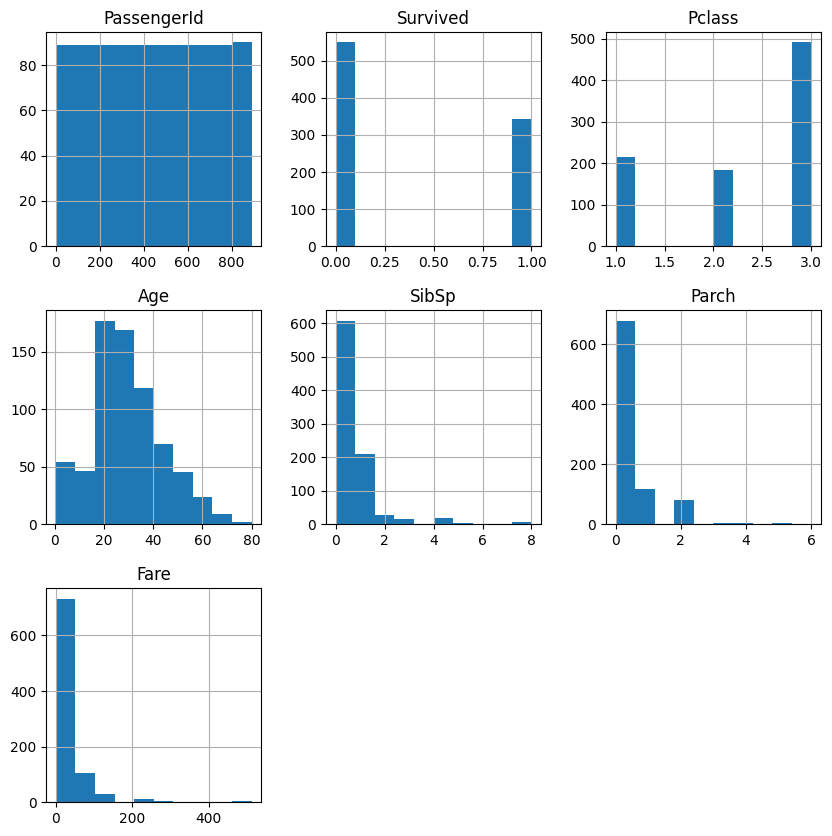

In [16]:
titanic_data.hist(figsize=(10,10))

3


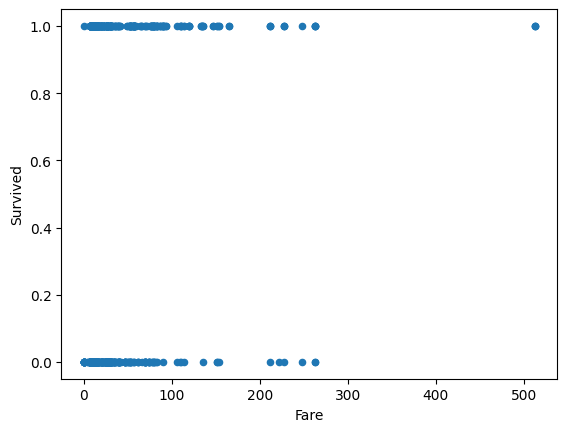

In [17]:
titanic_data.plot.scatter("Fare", "Survived")

boundary = 300
count = (titanic_data['Fare'] > boundary).sum()

print(count)

In [18]:
# preprocessing
titanic_data.dtypes
titanic_data.isnull().sum()

# transform into binary variables
le = LabelEncoder()
titanic_data["Sex_encoded"] = le.fit_transform(titanic_data["Sex"]) # male is encoded as 1

# dropping irrevant columns
titanic_data.drop(columns=["Cabin"])
titanic_data.drop(columns=["Ticket"])

# clip the fare data
# Define the lower and upper bounds for clipping
lower_bound = 0
upper_bound = 300

# Clip the values of the feature to the specified range
titanic_data['Fare'] = titanic_data['Fare'].clip(lower=lower_bound, upper=upper_bound)
# Remove rows with NaN values from Age column
cleaned_df = titanic_data.dropna(subset=['Age'])

In [23]:
# explore fare feature affect on survival
X = cleaned_df.drop("Survived", axis = 1)
y = cleaned_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 732)

model = LogisticRegression()


X_fare = X_train[["Fare"]]
fit = model.fit(X_fare, y_train)

#
intercept = model.intercept_
intercept

odds = np.exp(intercept) # more likely they died at 0 fare
print(odds)

log_or = model.coef_[0,0]
odds_ratio = np.exp(log_or)
#more_likely = True
#print(odds_ratio)

probs = model.predict_proba(X_fare)
print(probs)

# proportion of data set that was predicted correctly
accuracy = model.score(X_fare, y_train)
print(accuracy)

[0.43406859]
[[0.59973665 0.40026335]
 [0.61554204 0.38445796]
 [0.30786487 0.69213513]
 ...
 [0.69731671 0.30268329]
 [0.67436439 0.32563561]
 [0.61732437 0.38267563]]
0.647985989492119


In [24]:
X = cleaned_df.drop("Survived", axis = 1)
y = cleaned_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 732)

model1 = LogisticRegression()
model2 = LogisticRegression()
model3 = LogisticRegression()

X1 = X_train[["Fare", "Age"]]
X2 = X_train[["Pclass", "Sex_encoded"]]
X3 = X_train[["Pclass", "Sex_encoded", "Fare", "Age"]]


X1_test = X_test[["Fare", "Age"]]
X2_test = X_test[["Pclass", "Sex_encoded"]]
X3_test = X_test[["Pclass", "Sex_encoded", "Fare", "Age"]]

model1.fit(X1, y_train)
model2.fit(X2, y_train)
model3.fit(X3, y_train)

# different model scores based on various features 
print(model1.score(X1_test,y_test))
print(model2.score(X2_test,y_test))
print(model3.score(X3_test,y_test))

# 3rd model has best accuracy

0.6853146853146853
0.7622377622377622
0.7832167832167832


In [25]:
# feature selection (produce best clarification model)
#split-apply-combine
summary = cleaned_df.groupby("Survived").agg(
	{"Fare": "mean",
    "Age":"mean",
    "Pclass": "mean",
    "Sex_encoded": "mean"})
summary

,Fare,Age,Pclass,Sex_encoded
Survived,,,,
0,22.965456,30.626179,2.485849,0.849057
1,49.646696,28.343690,1.872414,0.320690


In [28]:
X = cleaned_df.drop("Survived", axis = 1)
y = cleaned_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 732)

model1 = LogisticRegression()
model2 = LogisticRegression()
model3 = LogisticRegression()

X1 = X_train[["Fare", "Age"]]
X2 = X_train[["Pclass", "Sex_encoded"]]
X3 = X_train[["Pclass", "Sex_encoded", "Fare", "Age"]]


X1_test = X_test[["Fare", "Age"]]
X2_test = X_test[["Pclass", "Sex_encoded"]]
X3_test = X_test[["Pclass", "Sex_encoded", "Fare", "Age"]]

model1.fit(X1, y_train)
model2.fit(X2, y_train)
model3.fit(X3, y_train)

# different model scores based on various features 
print(model1.score(X1_test,y_test))
print(model2.score(X2_test,y_test))
print(model3.score(X3_test,y_test))

# 3rd model has best accuracy

0.6853146853146853
0.7622377622377622
0.7832167832167832


In [26]:
# model complexity - address overfitting, investigate training and test error

X = cleaned_df.drop("Survived", axis = 1)
y = cleaned_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 732)

model1 = LogisticRegression()
model2 = LogisticRegression()
model3 = LogisticRegression()

X1 = X_train[["Fare"]]
X2 = X_train[["Fare", "Sex_encoded"]]
X3 = X_train[["Fare", "Sex_encoded", "Pclass"]]

X1_test = X_test[["Fare"]]
X2_test = X_test[["Fare", "Sex_encoded"]]
X3_test = X_test[["Fare", "Sex_encoded", "Pclass"]]

model1.fit(X1, y_train)
model2.fit(X2, y_train)
model3.fit(X3, y_train)

# train accuracies
print(model1.score(X1,y_train))
print(model2.score(X2,y_train)) # 2nd predictor 14% increase
print(model3.score(X3,y_train)) # doesn't improve accuracy

# test accuracies
print(model1.score(X1_test,y_test))
print(model2.score(X2_test,y_test))
print(model3.score(X3_test,y_test)) # indicates that the extra predictor doesn't help out with unseen data.

0.647985989492119
0.7793345008756567
0.7845884413309983
0.6923076923076923
0.7622377622377622
0.7622377622377622


In [27]:
# ensure both training sets contain instances of each class. Avoids complete separation problem.
died_train = sum(y_train == 0)
survive_train = sum(y_train == 1)
died_test = sum(y_test == 0)
survived_test = sum(y_test == 1)
print(died_train)
print(survive_train)
print(died_test)
print(survived_test)

340
231
84
59
